In [68]:
import pandas as pd
import numpy as np

In [69]:
data_df=pd.read_csv("F:\dta.csv",header=0,encoding="ISO-8859-1",engine='c')

In [13]:
data_df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [15]:
data_df.shape

(541909, 8)

In [17]:
data_df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [18]:
data_df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [19]:
data_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [20]:
data_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [70]:
import seaborn as sns
import matplotlib as plt

In [6]:
data_df['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

In [71]:
#invoiceDate need to be modified we to better describe the dataset and its relation with other parameters
data_df['InvoiceDate']=pd.to_datetime(data_df['InvoiceDate'])
data_df['Sales'] = data_df.Quantity*data_df.UnitPrice
data_df['Year']=data_df.InvoiceDate.dt.year
data_df['Month']=data_df.InvoiceDate.dt.month
data_df['Week']=data_df.InvoiceDate.dt.isocalendar().week
data_df['Year_Month']=data_df.InvoiceDate.dt.to_period('M')
data_df['Hour']=data_df.InvoiceDate.dt.hour
data_df['Day']=data_df.InvoiceDate.dt.day
data_df['is_cancelled']=data_df.InvoiceNo.apply(lambda x: 'Yes' if x[0]=='C' else 'No')
data_df['weekday']=data_df.InvoiceDate.dt.day_name() 

data_df['Date']=pd.to_datetime(data_df[['Year','Month','Day']])
data_df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Year,Month,Week,Year_Month,Hour,Day,is_cancelled,weekday,Date
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,48,2010-12,8,1,No,Wednesday,2010-12-01
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,48,2010-12,8,1,No,Wednesday,2010-12-01
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,48,2010-12,8,1,No,Wednesday,2010-12-01
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,48,2010-12,8,1,No,Wednesday,2010-12-01
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,48,2010-12,8,1,No,Wednesday,2010-12-01


In [37]:
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import TSNE

In [72]:
data_df['Description'] = data_df.Description.str.lower()

In [73]:
df_new = data_df.dropna()

In [41]:
df_new

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Year,Month,Week,Year_Month,Hour,Day,is_cancelled,weekday,Date
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,48,2010-12,8,1,No,Wednesday,2010-12-01
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,48,2010-12,8,1,No,Wednesday,2010-12-01
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,48,2010-12,8,1,No,Wednesday,2010-12-01
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,48,2010-12,8,1,No,Wednesday,2010-12-01
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,48,2010-12,8,1,No,Wednesday,2010-12-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011,12,49,2011-12,12,9,No,Friday,2011-12-09
541905,581587,22899,children's apron dolly girl,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12,49,2011-12,12,9,No,Friday,2011-12-09
541906,581587,23254,childrens cutlery dolly girl,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,49,2011-12,12,9,No,Friday,2011-12-09
541907,581587,23255,childrens cutlery circus parade,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12,49,2011-12,12,9,No,Friday,2011-12-09


In [42]:
df_new.isnull().sum()

InvoiceNo       0
StockCode       0
Description     0
Quantity        0
InvoiceDate     0
UnitPrice       0
CustomerID      0
Country         0
Sales           0
Year            0
Month           0
Week            0
Year_Month      0
Hour            0
Day             0
is_cancelled    0
weekday         0
Date            0
dtype: int64

In [74]:
df_new.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Sales', 'Year', 'Month', 'Week',
       'Year_Month', 'Hour', 'Day', 'is_cancelled', 'weekday', 'Date'],
      dtype='object')

In [47]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     406829 non-null  object        
 1   StockCode     406829 non-null  object        
 2   Description   406829 non-null  object        
 3   Quantity      406829 non-null  int64         
 4   InvoiceDate   406829 non-null  datetime64[ns]
 5   UnitPrice     406829 non-null  float64       
 6   CustomerID    406829 non-null  float64       
 7   Country       406829 non-null  object        
 8   Sales         406829 non-null  float64       
 9   Year          406829 non-null  int64         
 10  Month         406829 non-null  int64         
 11  Week          406829 non-null  UInt32        
 12  Year_Month    406829 non-null  period[M]     
 13  Hour          406829 non-null  int64         
 14  Day           406829 non-null  int64         
 15  is_cancelled  406

In [61]:
df_new.groupby(by=['CustomerID','Country'])['InvoiceNo'].count().head()

CustomerID  Country       
12346.0     United Kingdom      2
12347.0     Iceland           182
12348.0     Finland            31
12349.0     Italy              73
12350.0     Norway             17
Name: InvoiceNo, dtype: int64

c:\users\home\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: module 'matplotlib' has no attribute 'title'

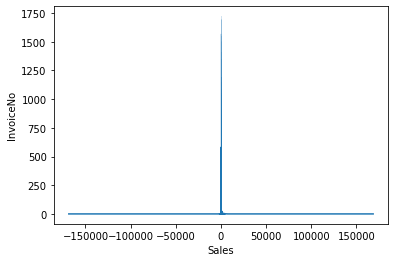

In [64]:
sales = df_new.groupby(by=['Sales','Country'], as_index=False)['InvoiceNo'].count()

sns.lineplot(sales.Sales, sales.InvoiceNo)

plt.title('sale per country')
plt.show()

c:\users\home\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


AttributeError: module 'matplotlib' has no attribute 'xlabel'

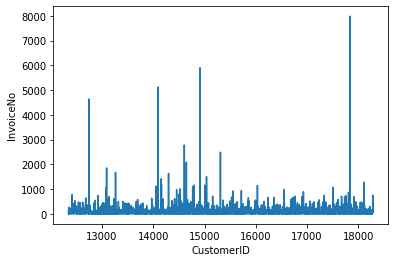

In [65]:
orders = df_new.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

sns.lineplot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customers ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

AttributeError: module 'matplotlib' has no attribute 'show'

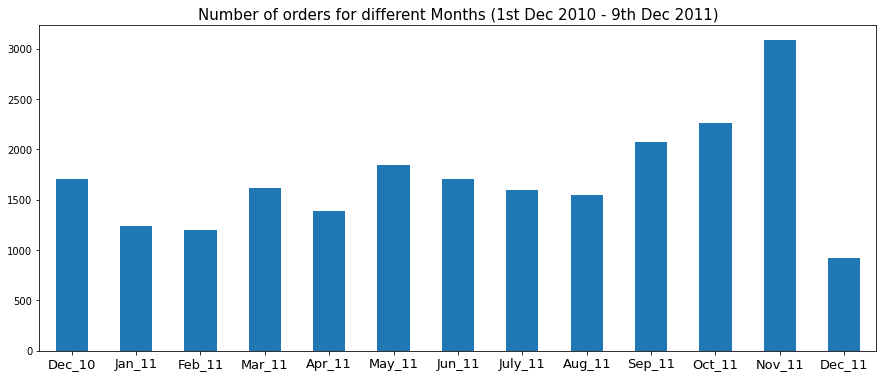

In [10]:
gj = df_new.groupby('InvoiceNo')['Year_Month'].unique().value_counts().sort_index().plot(kind='bar',figsize=(15,6))

gj.set_title('Number of orders for different Months (1st Dec 2010 - 9th Dec 2011)',fontsize=15)
gj.set_xticklabels(('Dec_10','Jan_11','Feb_11','Mar_11','Apr_11','May_11','Jun_11','July_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal', fontsize=13)
plt.show()

In [12]:
df_new.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index()

TypeError: unhashable type: 'numpy.ndarray'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas\_libs\hashtable_class_helper.pxi", line 1709, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'numpy.ndarray'


[6]       22
[7]       31
[8]      608
[9]     1622
[10]    2613
[11]    2769
[12]    3596
[13]    3043
[14]    2645
[15]    2405
[16]    1491
[17]     842
[18]     257
[19]     217
[20]      28
Name: Hour, dtype: int64

[Text(0, 0, '6'),
 Text(1, 0, '7'),
 Text(2, 0, '8'),
 Text(3, 0, '9'),
 Text(4, 0, '10'),
 Text(5, 0, '11'),
 Text(6, 0, '12'),
 Text(7, 0, '13'),
 Text(8, 0, '14'),
 Text(9, 0, '15'),
 Text(10, 0, '16'),
 Text(11, 0, '17'),
 Text(12, 0, '18'),
 Text(13, 0, '19'),
 Text(14, 0, '20')]

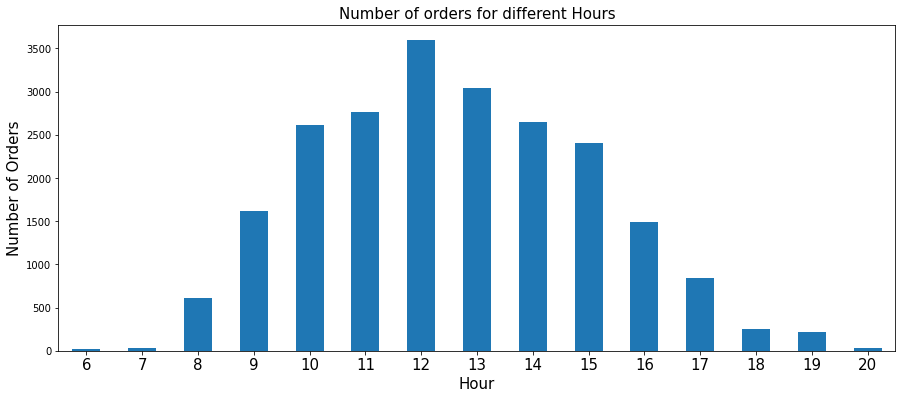

In [16]:
ax = df_new.groupby('InvoiceNo')['Hour'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar',figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for different Hours',fontsize=15)
ax.set_xticklabels(range(6,21), rotation='horizontal', fontsize=15)


In [17]:
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.manifold import TSNE

<AxesSubplot:>

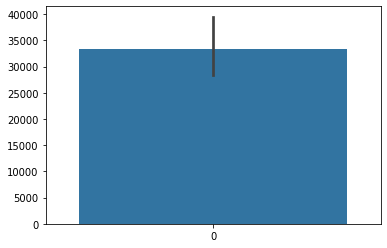

In [19]:
most_sold_prod = df_new.groupby(['Description'])['Quantity'].sum().sort_values(ascending=False)[:10]

sns.barplot(data=most_sold_prod)

In [20]:
df_new.corr()

,Quantity,UnitPrice,CustomerID,Sales,Year,Month,Week,Hour,Day
Quantity,1.000000,-0.001238,-0.003600,0.916096,0.001094,-0.002477,-0.002425,-0.008421,-0.000190
UnitPrice,-0.001238,1.000000,-0.004560,-0.129296,0.000979,-0.003179,-0.003323,0.001672,-0.001893
CustomerID,-0.003600,-0.004560,1.000000,-0.002274,-0.035955,0.030612,0.030267,0.064163,-0.001770
Sales,0.916096,-0.129296,-0.002274,1.000000,-0.000158,-0.001928,-0.001917,-0.007794,-0.000720
Year,0.001094,0.000979,-0.035955,-0.000158,1.000000,-0.341638,-0.327349,-0.019697,0.168057
Month,-0.002477,-0.003179,0.030612,-0.001928,-0.341638,1.000000,0.996309,0.055541,-0.118598
Week,-0.002425,-0.003323,0.030267,-0.001917,-0.327349,0.996309,1.000000,0.056042,-0.035197
Hour,-0.008421,0.001672,0.064163,-0.007794,-0.019697,0.055541,0.056042,1.000000,0.008186
Day,-0.000190,-0.001893,-0.001770,-0.000720,0.168057,-0.118598,-0.035197,0.008186,1.000000


<AxesSubplot:>

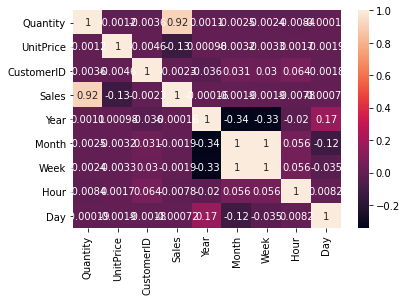

In [42]:


sns.heatmap(data=df_new.corr(),annot=True)

In [76]:
b= df_new.groupby('CustomerID')['InvoiceNo'].count()
b= b.reset_index()
b.columns = ['CustomerID', 'Frequency']

In [45]:
b.head()

,CustomerID,Frequency
0,12346.0,2
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [77]:
df_new['InvoiceDate'] = pd.to_datetime(df_new['InvoiceDate'])
max_date = df_new['InvoiceDate'].max()
max_date

<ipython-input-77-628535550527>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['InvoiceDate'] = pd.to_datetime(df_new['InvoiceDate'])


Timestamp('2011-12-09 12:50:00')

In [78]:
df_new['days_diff'] = max_date - df_new['InvoiceDate']
df_new.head()

<ipython-input-78-3232d8801a91>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['days_diff'] = max_date - df_new['InvoiceDate']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Sales,Year,Month,Week,Year_Month,Hour,Day,is_cancelled,weekday,Date,days_diff
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,48,2010-12,8,1,No,Wednesday,2010-12-01,373 days 04:24:00
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,48,2010-12,8,1,No,Wednesday,2010-12-01,373 days 04:24:00
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,48,2010-12,8,1,No,Wednesday,2010-12-01,373 days 04:24:00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,48,2010-12,8,1,No,Wednesday,2010-12-01,373 days 04:24:00
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,48,2010-12,8,1,No,Wednesday,2010-12-01,373 days 04:24:00


In [79]:
c = df_new.groupby('CustomerID')['days_diff'].min()
c = c.reset_index()
c.head()

,CustomerID,days_diff
0,12346.0,325 days 02:33:00
1,12347.0,1 days 20:58:00
2,12348.0,74 days 23:37:00
3,12349.0,18 days 02:59:00
4,12350.0,309 days 20:49:00


In [80]:
c['days_diff'] = c['days_diff'].dt.days
c.head()

,CustomerID,days_diff
0,12346.0,325
1,12347.0,1
2,12348.0,74
3,12349.0,18
4,12350.0,309


In [81]:
df_new['Amount'] = df_new['Quantity'] * df_new['UnitPrice']
a=df_new.groupby('CustomerID').sum()['Amount']
a= a.reset_index()
a.head()

<ipython-input-81-cf4058f8de99>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Amount'] = df_new['Quantity'] * df_new['UnitPrice']


,CustomerID,Amount
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [82]:
df1= pd.merge(a, b, on='CustomerID', how='inner')
df1.head()

,CustomerID,Amount,Frequency
0,12346.0,0.00,2
1,12347.0,4310.00,182
2,12348.0,1797.24,31
3,12349.0,1757.55,73
4,12350.0,334.40,17


In [83]:
df1 = pd.merge(df1, c, on='CustomerID', how='inner')
df1.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
df1.head()

,CustomerID,Amount,Frequency,Recency
0,12346.0,0.00,2,325
1,12347.0,4310.00,182,1
2,12348.0,1797.24,31,74
3,12349.0,1757.55,73,18
4,12350.0,334.40,17,309


In [84]:
from scipy.stats import zscore
df2=df1[['Amount','Frequency','Recency']]   # using only Amount, Frequency and Recency to find the customer segments.
df1_scaled = df2.apply(zscore)    # scaling of data is required as all the calculations is based on distance
df1_scaled.head()

,Amount,Frequency,Recency
0,-0.231001,-0.391720,2.322023
1,0.293432,0.382657,-0.893733
2,-0.012316,-0.266959,-0.169196
3,-0.017146,-0.086271,-0.725005
4,-0.190312,-0.327188,2.163220


In [85]:
kmeans = KMeans(random_state=2)
kmeans.fit(df1_scaled)

KMeans(random_state=2)

In [86]:
cluster_range = range( 1, 15 )
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters, n_init = 10 )
    clusters.fit(df1_scaled)
    cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,1,13116.000000
1,2,8988.644491
2,3,5408.406395
3,4,4013.855249
4,5,2937.979067
5,6,2329.474831
6,7,1861.956985
7,8,1616.435566
8,9,1419.964892
9,10,1253.131414


In [88]:
kmeans = KMeans(n_clusters=3, n_init = 15, random_state=2)
kmeans.fit(df1_scaled)
centroids = kmeans.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(df1_scaled) )
centroid_df

,Amount,Frequency,Recency
0,-0.174948,-0.281637,1.541206
1,0.006433,0.050932,-0.513707
2,14.213775,11.841639,-0.863958


In [89]:
df_labels = pd.DataFrame(kmeans.labels_ , columns = list(['labels']))
df_labels['labels'] = df_labels['labels'].astype('category')
df_kmeans = df1.join(df_labels)
df_kmeans.head()

,CustomerID,Amount,Frequency,Recency,labels
0,12346.0,0.00,2,325,0
1,12347.0,4310.00,182,1,1
2,12348.0,1797.24,31,74,1
3,12349.0,1757.55,73,18,1
4,12350.0,334.40,17,309,0


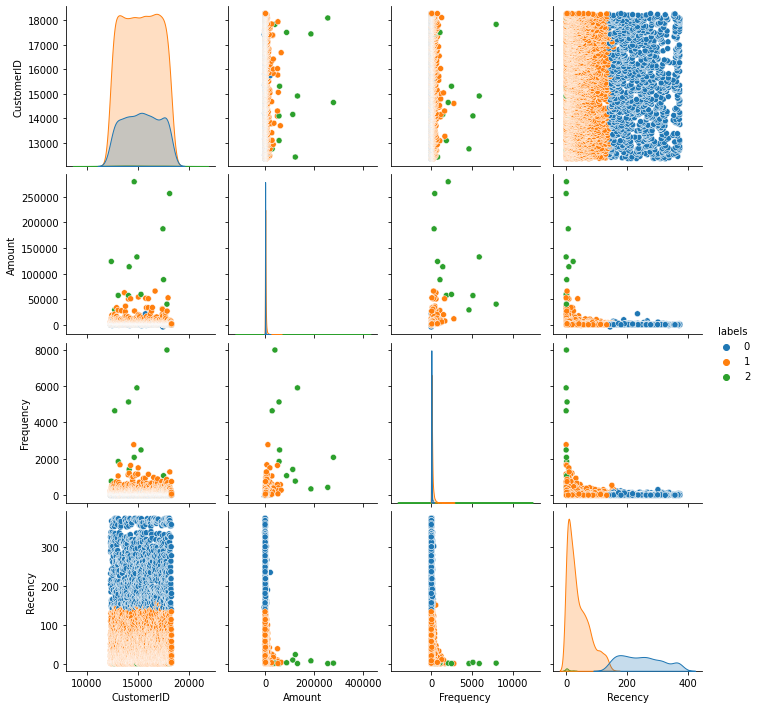

In [90]:
sns.pairplot(df_kmeans,diag_kind='kde',hue='labels')

In [ ]:
#three clusters are created 
#cluster 1 -people dont visit the site.
#cluster 0- people somewhat visiting  sometimes purchase products
#cluster 2- people are often visit the site 